In [1]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 12s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1200, 1800, 3)


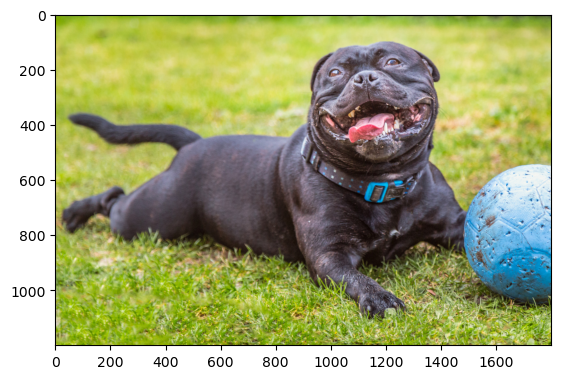

In [4]:
show_image("doggy_door_images/happy_dog.jpg")

In [5]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [6]:
processed_image = load_and_process_image("doggy_door_images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


In [7]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 1us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.45098132), ('n02110958', 'pug', 0.3226324), ('n02099712', 'Labrador_retriever', 0.09343182)]]


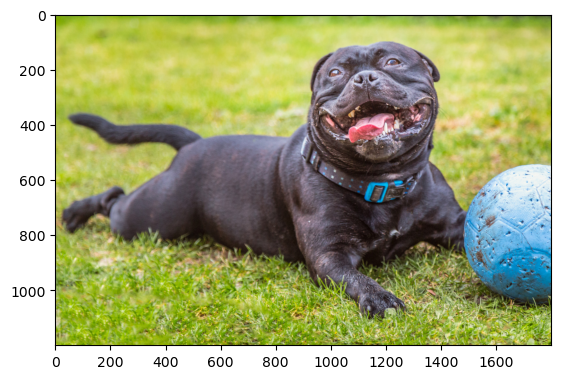

In [8]:
readable_prediction("doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 139ms/step
Predicted: [[('n02132136', 'brown_bear', 0.98538613), ('n02133161', 'American_black_bear', 0.013876267), ('n02410509', 'bison', 0.00026603724)]]


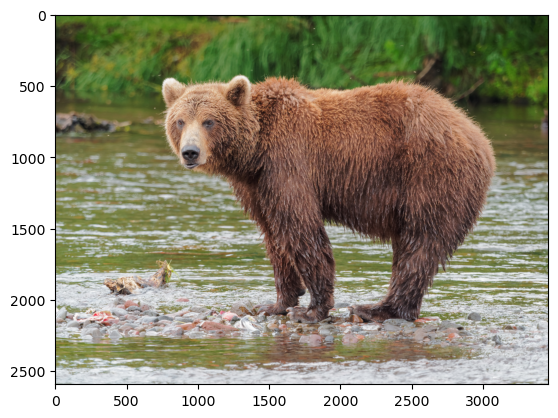

In [9]:
readable_prediction("doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 147ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.73654735), ('n02124075', 'Egyptian_cat', 0.17492665), ('n02123045', 'tabby', 0.04588383)]]


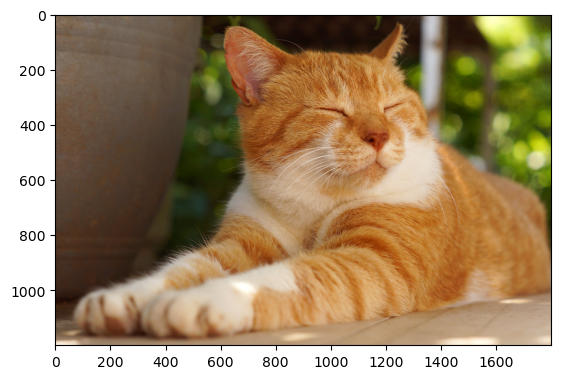

In [10]:
readable_prediction("doggy_door_images/sleepy_cat.jpg")

In [13]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 170ms/step
You're not a dog! Stay outside!


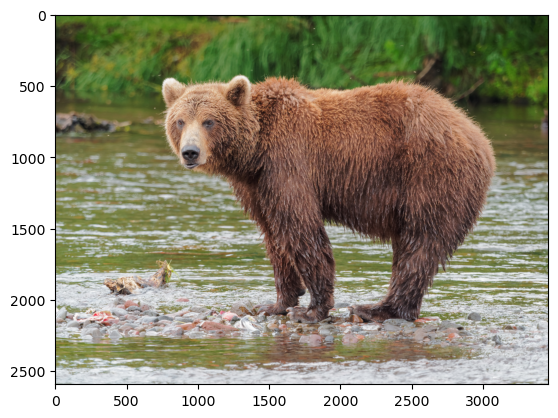

In [14]:
doggy_door("doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 140ms/step
Doggy come on in!


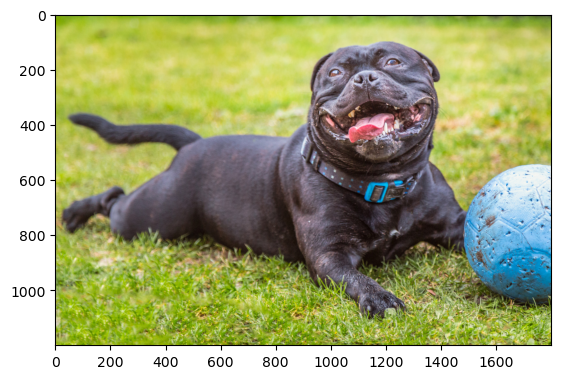

In [15]:
doggy_door("doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 151ms/step
Kitty stay inside!


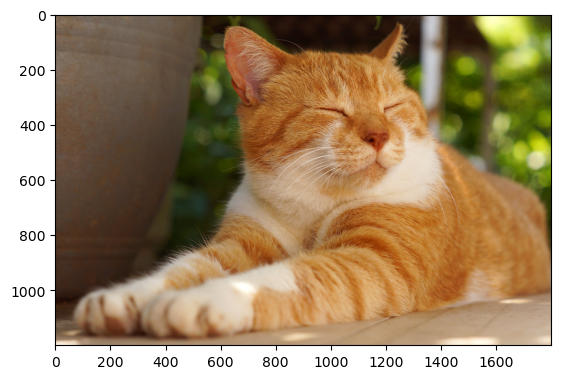

In [16]:
doggy_door("doggy_door_images/sleepy_cat.jpg")

In [17]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

In [18]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
base_model.trainable = False

In [20]:
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14715201 (56.13 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [22]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically

In [24]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('presidential_doggy_door/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('presidential_doggy_door/valid/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 139 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [25]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 12s 930ms/step - loss: 1.8362 - binary_accuracy: 0.7582 - val_loss: 1.9196 - val_binary_accuracy: 0.7000
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 0.9420 - binary_accuracy: 0.7917 - val_loss: 1.8316 - val_binary_accuracy: 0.7667
Epoch 3/20
12/12 [==============================] - 14s 1s/step - loss: 0.5774 - binary_accuracy: 0.8791 - val_loss: 1.0758 - val_binary_accuracy: 0.7333
Epoch 4/20
12/12 [==============================] - 15s 1s/step - loss: 0.5279 - binary_accuracy: 0.8791 - val_loss: 0.6523 - val_binary_accuracy: 0.8333
Epoch 5/20
12/12 [==============================] - 14s 1s/step - loss: 0.2372 - binary_accuracy: 0.9451 - val_loss: 0.4213 - val_binary_accuracy: 0.8667
Epoch 6/20
12/12 [==============================] - 13s 1s/step - loss: 0.4686 - binary_accuracy: 0.9121 - val_loss: 0.2222 - val_binary_accuracy: 0.9000
Epoch 7/20
12/12 [==============================] - 14s 1s/step - loss: 0

In [26]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [27]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 45s 4s/step - loss: 0.0688 - binary_accuracy: 0.9780 - val_loss: 0.0037 - val_binary_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 43s 4s/step - loss: 3.4132e-04 - binary_accuracy: 1.0000 - val_loss: 8.7149e-04 - val_binary_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 43s 4s/step - loss: 8.7944e-05 - binary_accuracy: 1.0000 - val_loss: 0.0110 - val_binary_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 40s 3s/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 3.5976e-04 - val_binary_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 42s 3s/step - loss: 1.0593e-04 - binary_accuracy: 1.0000 - val_loss: 0.0014 - val_binary_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 44s 4s/step - loss: 1.0512e-05 - binary_accuracy: 1.0000 - val_loss: 0.0010 - val_binary_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 

In [28]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 0s 247ms/step


array([[-27.044603]], dtype=float32)

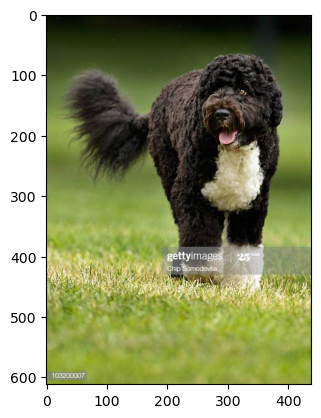

In [29]:
make_predictions('presidential_doggy_door/valid/bo/bo_20.jpg')

1/1 [==============================] - 0s 115ms/step


array([[29.27388]], dtype=float32)

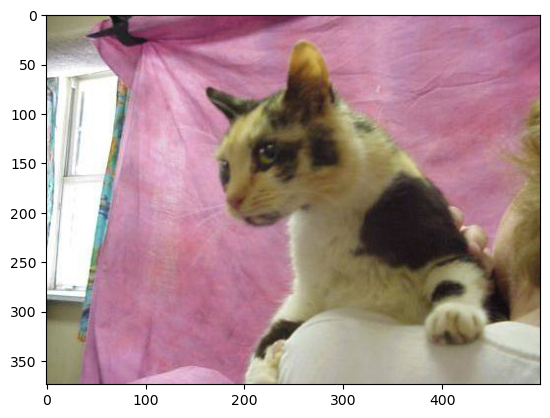

In [30]:
make_predictions('presidential_doggy_door/valid/not_bo/121.jpg')

In [33]:
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

1/1 [==============================] - 0s 104ms/step
That's not Bo! Stay out!


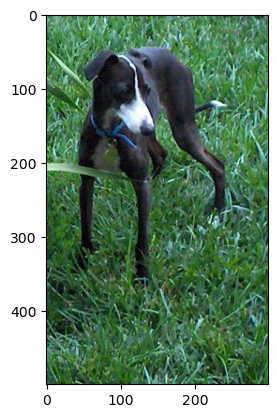

In [34]:
presidential_doggy_door('presidential_doggy_door/valid/not_bo/131.jpg')

1/1 [==============================] - 0s 104ms/step
It's Bo! Let him in!


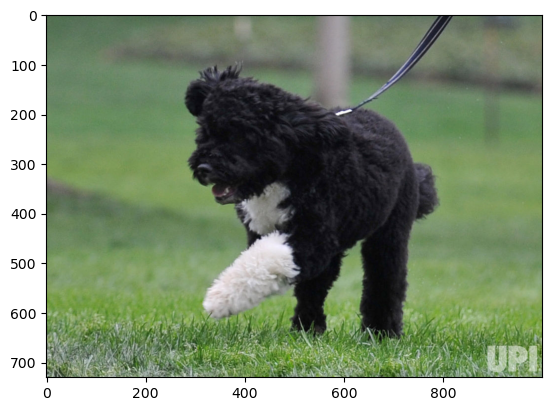

In [35]:
presidential_doggy_door('presidential_doggy_door/valid/bo/bo_29.jpg')

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)